In [1]:
import pandas as pd
import io
import requests
from datetime import timedelta, datetime, date
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\belac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#read in Department of Health Data and build list of dates and cities
url="https://www.vdh.virginia.gov/content/uploads/sites/182/2020/05/VDH-COVID-19-PublicUseDataset-Cases.csv"
df=pd.read_csv(url)
dates=df["Report Date"].unique()
df

,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths
0,7/17/2020,51001,Accomack,Eastern Shore,1048,73,14
1,7/17/2020,51003,Albemarle,Thomas Jefferson,593,42,10
2,7/17/2020,51005,Alleghany,Alleghany,54,5,2
3,7/17/2020,51007,Amelia,Piedmont,59,13,1
4,7/17/2020,51009,Amherst,Central Virginia,45,3,0
...,...,...,...,...,...,...,...
16354,3/17/2020,51800,Suffolk,Western Tidewater,0,0,0
16355,3/17/2020,51810,Virginia Beach,Virginia Beach,4,0,0
16356,3/17/2020,51820,Waynesboro,Central Shenandoah,0,0,0
16357,3/17/2020,51830,Williamsburg,Peninsula,1,0,0


In [4]:
dates

array(['7/17/2020', '7/16/2020', '7/15/2020', '7/14/2020', '7/13/2020',
       '7/12/2020', '7/11/2020', '7/10/2020', '7/9/2020', '7/8/2020',
       '7/7/2020', '7/6/2020', '7/5/2020', '7/4/2020', '7/3/2020',
       '7/2/2020', '7/1/2020', '6/30/2020', '6/29/2020', '6/28/2020',
       '6/27/2020', '6/26/2020', '6/25/2020', '6/24/2020', '6/23/2020',
       '6/22/2020', '6/21/2020', '6/20/2020', '6/19/2020', '6/18/2020',
       '6/17/2020', '6/16/2020', '6/15/2020', '6/14/2020', '6/13/2020',
       '6/12/2020', '6/11/2020', '6/10/2020', '6/9/2020', '6/8/2020',
       '6/7/2020', '6/6/2020', '6/5/2020', '6/4/2020', '6/3/2020',
       '6/2/2020', '6/1/2020', '5/31/2020', '5/30/2020', '5/29/2020',
       '5/28/2020', '5/27/2020', '5/26/2020', '5/25/2020', '5/24/2020',
       '5/23/2020', '5/22/2020', '5/21/2020', '5/20/2020', '5/19/2020',
       '5/18/2020', '5/17/2020', '5/16/2020', '5/15/2020', '5/14/2020',
       '5/13/2020', '5/12/2020', '5/11/2020', '5/10/2020', '5/9/2020',
       '5/8

# build list of dates

# April and May and June

In [5]:

#built initial list of dates for window
start_date = '4/01/2020'
end_date = '7/01/2020'
window_dates=[]
for date in dates:
    if (date >= start_date and date < end_date):
        window_dates.append(date)
window_dates2 = pd.to_datetime(window_dates)

date_ranges=[]
for date in window_dates2:
    date_ranges.append({str(date)[0:10]: str(date + timedelta(days=1))[0:10]})
len(date_ranges)

# # #break into key values for setting Since and Until on GoT
# # for i in date_ranges:
# #     for key in i:
# #         print(key, '->', i[key])

91

In [6]:
#build list of dates + 14 days in order to pull training data (forecast)
df['Report_Date'] = pd.to_datetime(df['Report Date'])
start_date = '03-31-2020'
end_date = '07-15-2020'
mask = (df['Report_Date'] > start_date) & (df['Report_Date'] < end_date)
big_window_data = df.loc[mask]
big_window_data.drop(["Report Date","FIPS","VDH Health District"], axis=1)


,Locality,Total Cases,Hospitalizations,Deaths,Report_Date
399,Accomack,1045,72,14,2020-07-14
400,Albemarle,578,38,10,2020-07-14
401,Alleghany,52,5,2,2020-07-14
402,Amelia,53,12,1,2020-07-14
403,Amherst,40,3,0,2020-07-14
...,...,...,...,...,...
14359,Suffolk,6,1,0,2020-04-01
14360,Virginia Beach,88,13,3,2020-04-01
14361,Waynesboro,2,0,0,2020-04-01
14362,Williamsburg,9,3,1,2020-04-01


In [7]:
#build list of + 14 data in window
cases_14=[]
hosp_14=[]
death_14=[]

start_date = datetime(2020,4,14)
end_date = datetime(2020,7,15)

for i in big_window_data.index: 
    if big_window_data["Report_Date"][i] > start_date and big_window_data["Report_Date"][i] < end_date:
        cases_14.append(big_window_data["Total Cases"][i])
        hosp_14.append(big_window_data["Hospitalizations"][i])
        death_14.append(big_window_data["Deaths"][i])       


## entire pandemic

In [ ]:
# #built initial list of dates for pandemic
# start_date = '3/17/2020'
# end_date = '7/9/2020'
# covid_dates=[]
# for date in dates:
#     if (date >= start_date and date < end_date):
#         covid_dates.append(date)
# covid_dates_df = pd.to_datetime(covid_dates)
# covid_dates_df
# # # create a dict of {day1: day2}, need for twitter 
# # date_ranges2=[]
# # for date in covid_dates_df:
# #     date_ranges2.append({str(date)[0:10]: str(date + timedelta(days=1))[0:10]})
# # date_ranges2

In [5]:
# #build list of dates + 14 days in order to pull training data (forecast)
# df['Report Date'] = pd.to_datetime(df['Report Date'])
# start_date = '03-31-2020'
# end_date = '07-09-2020'
# mask = (df['Report Date'] >= start_date) & (df['Report Date'] < end_date)
# covid_data = df.loc[mask]
# covid_data.drop(["FIPS","VDH Health District"], axis=1)
# covid_data.reset_index()

In [ ]:
# #build list of + 14 data in April
# cases_14=[]
# hosp_14=[]
# death_14=[]

# start_date = datetime(2020,3,31)
# end_date = datetime(2020,7,9)

# for i in covid_data.index: 
#     if covid_data["Report Date"][i] >= start_date and covid_data["Report Date"][i] < end_date:
#         cases_14.append(covid_data["Total Cases"][i])
#         hosp_14.append(covid_data["Hospitalizations"][i])
#         death_14.append(covid_data["Deaths"][i])   
# len(cases_14)

In [8]:
start_date = '03-31-2020'
end_date = '07-01-2020'
mask = (df['Report_Date'] > start_date) & (df['Report_Date'] < end_date)
df3= df.loc[mask]
df3.reset_index()

,index,Report Date,FIPS,Locality,VDH Health District,Total Cases,Hospitalizations,Deaths,Report_Date
0,2261,6/30/2020,51001,Accomack,Eastern Shore,1042,71,14,2020-06-30
1,2262,6/30/2020,51003,Albemarle,Thomas Jefferson,401,28,8,2020-06-30
2,2263,6/30/2020,51005,Alleghany,Alleghany,31,5,2,2020-06-30
3,2264,6/30/2020,51007,Amelia,Piedmont,44,11,1,2020-06-30
4,2265,6/30/2020,51009,Amherst,Central Virginia,36,3,0,2020-06-30
...,...,...,...,...,...,...,...,...,...
12098,14359,4/1/2020,51800,Suffolk,Western Tidewater,6,1,0,2020-04-01
12099,14360,4/1/2020,51810,Virginia Beach,Virginia Beach,88,13,3,2020-04-01
12100,14361,4/1/2020,51820,Waynesboro,Central Shenandoah,2,0,0,2020-04-01
12101,14362,4/1/2020,51830,Williamsburg,Peninsula,9,3,1,2020-04-01


In [10]:
df3['Total_Cases_+14d'] = cases_14
df3['Hosp +14d'] = hosp_14
df3['Death +14d'] = death_14
covid_clean=df3[["Report_Date","Locality","Total Cases","Hospitalizations","Deaths", "Total_Cases_+14d", "Hosp +14d","Death +14d"]]
covid_clean

C:\Users\belac\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\belac\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\belac\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,Report_Date,Locality,Total Cases,Hospitalizations,Deaths,Total_Cases_+14d,Hosp +14d,Death +14d
2261,2020-06-30,Accomack,1042,71,14,1045,72,14
2262,2020-06-30,Albemarle,401,28,8,578,38,10
2263,2020-06-30,Alleghany,31,5,2,52,5,2
2264,2020-06-30,Amelia,44,11,1,53,12,1
2265,2020-06-30,Amherst,36,3,0,40,3,0
...,...,...,...,...,...,...,...,...
14359,2020-04-01,Suffolk,6,1,0,59,14,1
14360,2020-04-01,Virginia Beach,88,13,3,256,54,5
14361,2020-04-01,Waynesboro,2,0,0,6,1,0
14362,2020-04-01,Williamsburg,9,3,1,19,5,1


# Pull Tweets

In [144]:
# dates_1=[]
# dates_2=[]
# dates_3=[]
   
# for i in date_ranges[0:11]:
#     dates_1.append(i)  
# for i in date_ranges[11:21]:
#     dates_2.append(i)  
# for i in date_ranges[21:30]:
#     dates_3.append(i)  

In [195]:
dates_1=[]
dates_2=[]
dates_3=[]
   
 
for i in date_ranges[30:41]:
    dates_1.append(i)  
for i in date_ranges[41:51]:
    dates_2.append(i)  
for i in date_ranges[51:61]:
    dates_3.append(i)  
dates_1

[{'2020-05-31': '2020-06-01'},
 {'2020-05-30': '2020-05-31'},
 {'2020-05-29': '2020-05-30'},
 {'2020-05-28': '2020-05-29'},
 {'2020-05-27': '2020-05-28'},
 {'2020-05-26': '2020-05-27'},
 {'2020-05-25': '2020-05-26'},
 {'2020-05-24': '2020-05-25'},
 {'2020-05-23': '2020-05-24'},
 {'2020-05-22': '2020-05-23'},
 {'2020-05-21': '2020-05-22'}]

In [ ]:
# #fetch tweets from just RVA for (4/1/20: 3417 Tweets) (april:3000 )
# import GetOldTweets3 as got
# city='Richmond, VA'

# text_tweets=[]
# for date in date_ranges:
#     for key in date:        
#         tweetCriteria = got.manager.TweetCriteria().setNear(city).setSince(key).setUntil(date[key]).setMaxTweets(1000)
#         tweets = got.manager.TweetManager.getTweets(tweetCriteria)
#         for tweet in tweets:
#             text_tweets.append([tweet.date, tweet.text, tweet.hashtags, city])

# tweets_df = pd.DataFrame(text_tweets, columns = ['Datetime', 'Text','hashtags', 'city'])
# tweets_df['tokenized_tweets'] = tweets_df.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1)
# tweets_df['date'] = tweets_df['Datetime'].dt.date
# tweets_df.to_csv('va_April.csv')

In [196]:
# # fetch tweets from just RVA for (4/1/20: 3417 Tweets) (April and May:35,000 )
# import GetOldTweets3 as got
# import time
# city='Richmond, VA'

# print ('starting first download')
# text_tweets1=[]    
# for date in dates_1:
#     for key in date:        
#         tweetCriteria = got.manager.TweetCriteria().setNear(city).setSince(key).setUntil(date[key]).setMaxTweets(1000)
#         firsttweets = got.manager.TweetManager.getTweets(tweetCriteria)
#         for tweet in firsttweets:
#             text_tweets1.append([tweet.date, tweet.text, tweet.hashtags, city])

# tweets_df1 = pd.DataFrame(text_tweets1, columns = ['Datetime', 'Text','hashtags', 'city'])
# tweets_df1['date'] = tweets_df1['Datetime'].dt.date
# # tweets_df1.to_csv('va_April.csv')
    
# time.sleep(600)
    
# print ('starting second download')
# text_tweets2=[]    
# for date in dates_2:
#     for key in date:        
#         tweetCriteria = got.manager.TweetCriteria().setNear(city).setSince(key).setUntil(date[key]).setMaxTweets(1000)
#         sectweets = got.manager.TweetManager.getTweets(tweetCriteria)
#         for tweet in sectweets:
#             text_tweets2.append([tweet.date, tweet.text, tweet.hashtags, city])

# tweets_df2 = pd.DataFrame(text_tweets2, columns = ['Datetime', 'Text','hashtags', 'city'])
# tweets_df2['date'] = tweets_df2['Datetime'].dt.date
# # tweets_df1.to_csv('va_April.csv')
    
# time.sleep(600)
    
# print ('starting third download')

# text_tweets3=[] 
# for date in dates_3:
#     for key in date:        
#         tweetCriteria = got.manager.TweetCriteria().setNear(city).setSince(key).setUntil(date[key]).setMaxTweets(1000)
#         thirdtweets = got.manager.TweetManager.getTweets(tweetCriteria)
#         for tweet in thirdtweets:
#             text_tweets3.append([tweet.date, tweet.text, tweet.hashtags, city])

# tweets_df3 = pd.DataFrame(text_tweets3, columns = ['Datetime', 'Text','hashtags', 'city'])
# tweets_df3['date'] = tweets_df3['Datetime'].dt.date
# # tweets_df1.to_csv('va_April.csv')
    
# # time.sleep(600)
    
# df=pd.concat([tweets_df1,tweets_df2,tweets_df3])
# df.to_csv('va_May_30000.csv')

starting first download
starting second download
starting third download


# clean DoH data to (only RVA) 


In [8]:
#get April in RVA
rva_df=covid_clean.loc[covid_clean["Locality"]== 'Richmond City']
rva_df2=rva_df.set_index("Report_Date")
rva_df2


,Locality,Total Cases,Hospitalizations,Deaths,Total_Cases_+14d
Report_Date,,,,,
2020-06-30,Richmond City,2209,220,30,2457
2020-06-29,Richmond City,2195,218,30,2432
2020-06-28,Richmond City,2184,214,30,2415
2020-06-27,Richmond City,2159,214,30,2386
2020-06-26,Richmond City,2133,212,30,2361
...,...,...,...,...,...
2020-04-05,Richmond City,99,7,1,231
2020-04-04,Richmond City,96,4,2,211
2020-04-03,Richmond City,76,3,1,201


# group DoH data by date (entire state)

In [11]:
#group by date (for large graph)
by_date=covid_clean.groupby('Report_Date').sum()
by_date
by_date.to_csv('va_all_pandemic.csv')

In [10]:
# by_date['14 day increase']=by_date['Total Cases +14d']-by_date['Total Cases']
# by_date['delta 14']=by_date['14 day increase'].diff()
# by_date['delta cases']=by_date['Total Cases'].diff()
# by_date.head()

In [60]:
#read in Tweet IDF
url="tweet_idfs_90k_5000.csv"
df=pd.read_csv(url)
df2=df.sort_values("Unnamed: 0")
df3=df2.set_index("Unnamed: 0")
df3.head()

,im,like,dont,get,one,people,know,time,richmond,love,...,lamb,laptop,libertyfootball,lisa,lobster,louder,lufbrecruiting,magazine,maintenance,manage
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2020-04-01,0.272702,0.196028,0.145012,0.138361,0.154861,0.093157,0.107478,0.148311,0.070787,0.089509,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2020-04-02,0.266370,0.152938,0.118083,0.149538,0.103530,0.099826,0.092334,0.118083,0.099826,0.076964,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.005956
2020-04-03,0.249805,0.196048,0.127623,0.189491,0.127623,0.086401,0.116700,0.113011,0.120365,0.109296,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.006088,0.0,0.000000
2020-04-04,0.223321,0.239671,0.175161,0.166335,0.123516,0.123516,0.126676,0.084005,0.110690,0.066442,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2020-04-05,0.278060,0.234135,0.134973,0.181071,0.127576,0.072590,0.153084,0.104775,0.076750,0.080867,...,0.0,0.0,0.0,0.006295,0.0,0.006295,0.0,0.000000,0.0,0.000000


In [61]:
merged_df= pd.merge(rva_df2, df3, left_index=True, right_index=True)
merged_df3=merged_df.dropna(how='any')
merged_df3.head()


,Locality,Total Cases,Hospitalizations,Deaths,Total_Cases_+14d,im,like,dont,get,one,...,lamb,laptop,libertyfootball,lisa,lobster,louder,lufbrecruiting,magazine,maintenance,manage
2020-06-30,Richmond City,2209,220,30,2457,0.204681,0.256778,0.132713,0.112550,0.122721,...,0.0,0.0,0.000000,0.0,0.000000,0.005674,0.000000,0.0,0.0,0.000000
2020-06-29,Richmond City,2195,218,30,2432,0.242635,0.226717,0.177084,0.171370,0.153944,...,0.0,0.0,0.000000,0.0,0.005273,0.000000,0.000000,0.0,0.0,0.000000
2020-06-28,Richmond City,2184,214,30,2415,0.275791,0.235121,0.153630,0.156699,0.138068,...,0.0,0.0,0.005487,0.0,0.000000,0.000000,0.005487,0.0,0.0,0.000000
2020-06-27,Richmond City,2159,214,30,2386,0.214895,0.193655,0.114031,0.137792,0.120064,...,0.0,0.0,0.000000,0.0,0.000000,0.009749,0.000000,0.0,0.0,0.005096
2020-06-26,Richmond City,2133,212,30,2361,0.215126,0.200838,0.111995,0.137728,0.121781,...,0.0,0.0,0.000000,0.0,0.000000,0.005460,0.000000,0.0,0.0,0.000000


In [62]:
merged_df2=merged_df3.reindex(index=merged_df3.index[::-1])
merged_df2.head()

,Locality,Total Cases,Hospitalizations,Deaths,Total_Cases_+14d,im,like,dont,get,one,...,lamb,laptop,libertyfootball,lisa,lobster,louder,lufbrecruiting,magazine,maintenance,manage
2020-04-01,Richmond City,33,2,0,177,0.272702,0.196028,0.145012,0.138361,0.154861,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2020-04-02,Richmond City,52,2,1,188,0.266370,0.152938,0.118083,0.149538,0.103530,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.005956
2020-04-03,Richmond City,76,3,1,201,0.249805,0.196048,0.127623,0.189491,0.127623,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.006088,0.0,0.000000
2020-04-04,Richmond City,96,4,2,211,0.223321,0.239671,0.175161,0.166335,0.123516,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2020-04-05,Richmond City,99,7,1,231,0.278060,0.234135,0.134973,0.181071,0.127576,...,0.0,0.0,0.0,0.006295,0.0,0.006295,0.0,0.000000,0.0,0.000000


## shape and perform LinReg

In [229]:
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical
# data = by_date.values
# X = data[:, 0:4]
# y = data[:, 1]


# # Step 1: Label-encode data set
# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)



# # Step 2: One-hot encoding
# one_hot_y = to_categorical(encoded_y)
# one_hot_y

In [63]:
# merged_df2['14_day_increase']=merged_df2['Total_Cases_+14d']-merged_df2['Total Cases']
merged_df2['delta_14']=merged_df2['Total_Cases_+14d'].diff(periods=-1).abs()
merged_df2['delta cases']=merged_df2['Total Cases'].diff(periods=-1).abs()
merged_df3=merged_df2.dropna(how='any')
merged_df3['delta_14']=merged_df3['delta_14'].astype(int)
merged_df3['delta cases']=merged_df3['delta cases'].astype(int)
merged_df3.head()

C:\Users\belac\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\belac\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Locality,Total Cases,Hospitalizations,Deaths,Total_Cases_+14d,im,like,dont,get,one,...,libertyfootball,lisa,lobster,louder,lufbrecruiting,magazine,maintenance,manage,delta_14,delta cases
2020-04-01,Richmond City,33,2,0,177,0.272702,0.196028,0.145012,0.138361,0.154861,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,11,19
2020-04-02,Richmond City,52,2,1,188,0.266370,0.152938,0.118083,0.149538,0.103530,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.005956,13,24
2020-04-03,Richmond City,76,3,1,201,0.249805,0.196048,0.127623,0.189491,0.127623,...,0.0,0.000000,0.0,0.000000,0.0,0.006088,0.0,0.000000,10,20
2020-04-04,Richmond City,96,4,2,211,0.223321,0.239671,0.175161,0.166335,0.123516,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,20,3
2020-04-05,Richmond City,99,7,1,231,0.278060,0.234135,0.134973,0.181071,0.127576,...,0.0,0.006295,0.0,0.006295,0.0,0.000000,0.0,0.000000,5,6


In [64]:
days=[]

for i in range(0,len(merged_df3)):
    days.append(i+13)

merged_df3['days']=days
merged_df3['daily_avg']=merged_df3['Total Cases']/merged_df3['days']
merged_df3['daily_avg']=merged_df3['daily_avg'].astype(int)
merged_df3


C:\Users\belac\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\belac\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\belac\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Locality,Total Cases,Hospitalizations,Deaths,Total_Cases_+14d,im,like,dont,get,one,...,lisa,lobster,louder,lufbrecruiting,magazine,maintenance,manage,delta_14,delta cases,daily_avg
2020-04-01,Richmond City,33,2,0,177,0.272702,0.196028,0.145012,0.138361,0.154861,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,11,19,2
2020-04-02,Richmond City,52,2,1,188,0.266370,0.152938,0.118083,0.149538,0.103530,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.005956,13,24,3
2020-04-03,Richmond City,76,3,1,201,0.249805,0.196048,0.127623,0.189491,0.127623,...,0.000000,0.000000,0.000000,0.000000,0.006088,0.0,0.000000,10,20,5
2020-04-04,Richmond City,96,4,2,211,0.223321,0.239671,0.175161,0.166335,0.123516,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,20,3,6
2020-04-05,Richmond City,99,7,1,231,0.278060,0.234135,0.134973,0.181071,0.127576,...,0.006295,0.000000,0.006295,0.000000,0.000000,0.0,0.000000,5,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-25,Richmond City,2089,206,30,2333,0.249056,0.231542,0.127846,0.151126,0.141254,...,0.000000,0.000000,0.005746,0.005746,0.000000,0.0,0.000000,28,44,21
2020-06-26,Richmond City,2133,212,30,2361,0.215126,0.200838,0.111995,0.137728,0.121781,...,0.000000,0.000000,0.005460,0.000000,0.000000,0.0,0.000000,25,26,21
2020-06-27,Richmond City,2159,214,30,2386,0.214895,0.193655,0.114031,0.137792,0.120064,...,0.000000,0.000000,0.009749,0.000000,0.000000,0.0,0.005096,29,25,21
2020-06-28,Richmond City,2184,214,30,2415,0.275791,0.235121,0.153630,0.156699,0.138068,...,0.000000,0.000000,0.000000,0.005487,0.000000,0.0,0.000000,17,11,21


In [65]:
        
import numpy as np
        
merged_df3['change_in_avg'] = np.where(merged_df3['delta_14'] > merged_df3['daily_avg'], 'increase', 'decrease')

# future exploration  - df['new col'] = df.apply()

# merged_df3['left']=merged_df3['daily avg']/2
# merged_df3['right']=merged_df3['daily avg']/2
# merged_df3

C:\Users\belac\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
merged_df3.to_csv('case_accel_RVA_April_June_1000.csv')

In [174]:
# X = merged_df3[["Total Cases", "daily_avg", "Hospitalizations", "Deaths", 'mask', 'face', 'covid', 'corona', 'virus', 'richmond', 'listen']]
# y = merged_df3["change_in_avg"].values.reshape(-1,1)

# DecisionTree and RandomForest

In [66]:
from sklearn import tree
target =  merged_df3["change_in_avg"].values.reshape(-1,1)

In [67]:
data = merged_df3.drop(["change_in_avg", "Locality", "Total_Cases_+14d", "delta_14","delta cases"], axis=1)
feature_names = data.columns
data.head()


,Total Cases,Hospitalizations,Deaths,im,like,dont,get,one,people,know,...,laptop,libertyfootball,lisa,lobster,louder,lufbrecruiting,magazine,maintenance,manage,daily_avg
2020-04-01,33,2,0,0.272702,0.196028,0.145012,0.138361,0.154861,0.093157,0.107478,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,2
2020-04-02,52,2,1,0.266370,0.152938,0.118083,0.149538,0.103530,0.099826,0.092334,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.005956,3
2020-04-03,76,3,1,0.249805,0.196048,0.127623,0.189491,0.127623,0.086401,0.116700,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.006088,0.0,0.000000,5
2020-04-04,96,4,2,0.223321,0.239671,0.175161,0.166335,0.123516,0.123516,0.126676,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,6
2020-04-05,99,7,1,0.278060,0.234135,0.134973,0.181071,0.127576,0.072590,0.153084,...,0.0,0.0,0.006295,0.0,0.006295,0.0,0.000000,0.0,0.000000,5


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [69]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print('Train score: {}'.format(clf.score(X_train, y_train)))
print('Test score: {}'.format(clf.score(X_test, y_test)))

Train score: 1.0
Test score: 0.8260869565217391


In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

C:\Users\belac\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8260869565217391

In [71]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.02308702662683893, 'Hospitalizations'),
 (0.020497311827956992, 'extremely'),
 (0.016713383074544605, 'work'),
 (0.014469077231964729, 'graffiti'),
 (0.014223303273329537, 'police'),
 (0.014200705557958477, 'law'),
 (0.013980263157894739, 'fitness'),
 (0.013477739482224483, 'presence'),
 (0.012992831541218646, 'groups'),
 (0.011640821915212159, 'please'),
 (0.011510442773600667, 'explain'),
 (0.011116717396283914, 'traitor'),
 (0.010693153875254172, 'davis'),
 (0.010680001167133522, 'health'),
 (0.010641885634145696, 'brothers'),
 (0.01061971434997751, 'richmondpolice'),
 (0.010505040138660828, 'pump'),
 (0.01047714681440443, 'racists'),
 (0.010301382496895318, 'officers'),
 (0.01017074150596878, 'protest'),
 (0.010036402990948446, 'ave'),
 (0.009873329894881619, 'tear'),
 (0.009659856652781183, 'caught'),
 (0.009652307559925561, 'justice'),
 (0.009493927125506075, 'article'),
 (0.009296875, 'anyone'),
 (0.00924059139784947, 'blacklivesmatter'),
 (0.009162248983677554, 'album'),
 (

In [23]:
y_test_ar=[]
for i in y_test:
    for j in i:
        y_test_ar.append(j)
y_test_ar

['increase',
 'increase',
 'increase',
 'decrease',
 'increase',
 'increase',
 'increase',
 'increase',
 'increase',
 'increase',
 'decrease',
 'increase',
 'increase',
 'increase',
 'increase',
 'decrease',
 'increase',
 'increase',
 'increase',
 'increase',
 'increase',
 'increase',
 'decrease']

In [40]:
prob=rf.predict_proba(X_test)
prob_array=[]
for i in prob:
    prob_array.append(i)
prob_array

[array([0.05, 0.95]),
 array([0.125, 0.875]),
 array([0.2, 0.8]),
 array([0.325, 0.675]),
 array([0.05, 0.95]),
 array([0.1, 0.9]),
 array([0.175, 0.825]),
 array([0.175, 0.825]),
 array([0.2, 0.8]),
 array([0.2, 0.8]),
 array([0.35, 0.65]),
 array([0.175, 0.825]),
 array([0.225, 0.775]),
 array([0.325, 0.675]),
 array([0.125, 0.875]),
 array([0.2, 0.8]),
 array([0.05, 0.95]),
 array([0.075, 0.925]),
 array([0.125, 0.875]),
 array([0.4, 0.6]),
 array([0.425, 0.575]),
 array([0.325, 0.675]),
 array([0.45, 0.55])]

In [41]:
predicted=rf.predict(X_test)

d = {'date': X_test.index,'actual': y_test_ar, 'predicted': predicted, 'probability': prob_array}
df = pd.DataFrame(data=d)
# df.to_csv('actual_v_predicted.csv')
df

,date,actual,predicted,probability
0,2020-05-11,increase,increase,"[0.05, 0.95]"
1,2020-04-23,increase,increase,"[0.125, 0.875]"
2,2020-05-26,increase,increase,"[0.2, 0.8]"
3,2020-06-10,decrease,increase,"[0.325, 0.675]"
4,2020-04-01,increase,increase,"[0.05, 0.95]"
5,2020-04-27,increase,increase,"[0.1, 0.9]"
6,2020-05-10,increase,increase,"[0.175, 0.825]"
7,2020-06-05,increase,increase,"[0.175, 0.825]"
8,2020-04-11,increase,increase,"[0.2, 0.8]"
9,2020-05-15,increase,increase,"[0.2, 0.8]"


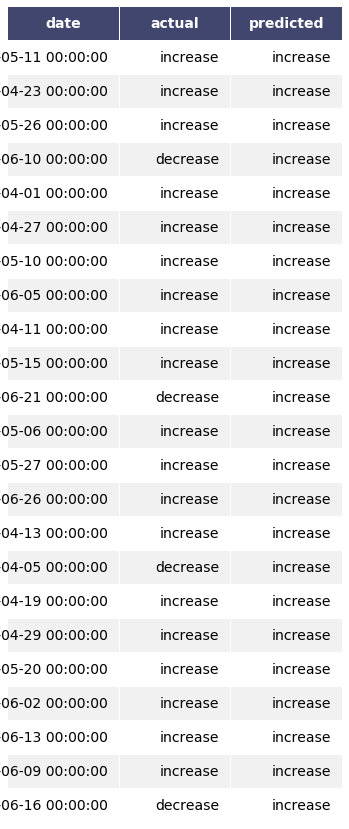

In [29]:
import matplotlib.pyplot as plt
import six



def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

table=render_mpl_table(df, header_columns=0, col_width=2.0)


In [30]:
table.get_figure().savefig('actual_v_predict.png')

# RF grid-search

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10,40, 50, 100],
             'max_features': ['Auto/None', 'sqrt', 0.2],
             '}
grid = GridSearchCV(rf, param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_features=Auto/None, min_sample_leaf=50, n_estimators=10 .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter min_sample_leaf for estimator RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features='Auto/None', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=40, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [53]:
print(grid.best_params_)

{'max_features': 'sqrt', 'n_estimators': 50}


In [54]:
print(grid.best_score_)

0.820879120879121




# lin reg model

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# # X_train=X.iloc[0:75,]
# # X_test=X.iloc[75:,]
# # y_train=y[0:75]
# # y_test=y[75:]
# model = LinearRegression()

# # X_scaler = StandardScaler().fit(X_train)
# # y_scaler = StandardScaler().fit(y_train)

# # X_train_scaled = X_scaler.transform(X_train)
# # X_test_scaled = X_scaler.transform(X_test)
# # y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)
# y_test


# model.fit(X_train, y_train)
# training_score = model.score(X_train, y_train)
# testing_score = model.score(X_test, y_test)
# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")

# import matplotlib.pyplot as plt
# predictions = model.predict(X_test)
# model.fit(X_train, y_train)
# plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
# plt.title("Residual Plot")
# plt.show()

# from sklearn.metrics import mean_squared_error

# MSE = mean_squared_error(y_test, predictions)
# r2 = model.score(X_test, y_test)

# print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
## basic count of tweets
# tweet_count=[]
# counter2 = 0
# for city in cities_in_va:
#     for row in tweets_df['city']:
#         if row == city:
#             counter2 +=1
#     tweet_count.append({city: counter2})
#     counter2 = 0
    
# tweet_count


# # iterate two columns
# tuple_df =tweets_df[['city','tokenized_tweets']]
# for a, b in tuple_df.itertuples(index=False):
#     print (a, b)
